### Tangential Velocity

*In Lecture \#6 we derived the formula for the tangential velocity of a point on the Earth to be $R\omega\ sin\ \phi$ where $\phi$ is the latitude (and $R = R_e = 6378.14\ km$ and $\omega = \omega_e = 15^{\circ}/hr$).*

- *a) Graph the tangential velocity as a function of latitude*
- *b) Explain why the velocity at the pole is what it is*
- *c) For a geosynchronous orbit inclined at 20 degrees, compare the orbital velocity (as a vector) to the tangential velocity as a vector at a latitude of 20 degrees. Which is moving faster Eastwards, the spacecraft or the ground*

---

Alright let's get started! First things first, we need a couple of imports, a couple of constants, and a couple of convenience functions.

In [14]:
%matplotlib inline
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# configure matplotlib to look nice
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 2

# constants
R_E   = 6378.14     # radius of the earth (km)
ROT_E = 15.0/3600.0 # angular velocity of equator of the earth (degree/second)
GEO   = 42164.0     # geostationary orbit altitude (km)

# convenience functions
rad_to_deg = lambda r: float(r) * 180.0/np.pi # radians to degrees
deg_to_rad = lambda d: float(d) * np.pi/180.0 # degrees to radians

def plot(xlabel, ylabel, *plt_args, **kwargs):
    width = kwargs['width'] if 'width' in kwargs else 12
    height = kwargs['height'] if 'height' in kwargs else 8
    plt.figure(figsize=(width, height))
    plt.plot(*plt_args)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

#### a) *Graph the tangential velocity..*
Let's just build up an array of velocity values based on latitude. We subtract $\phi$ from 90 to get the actual latitude.

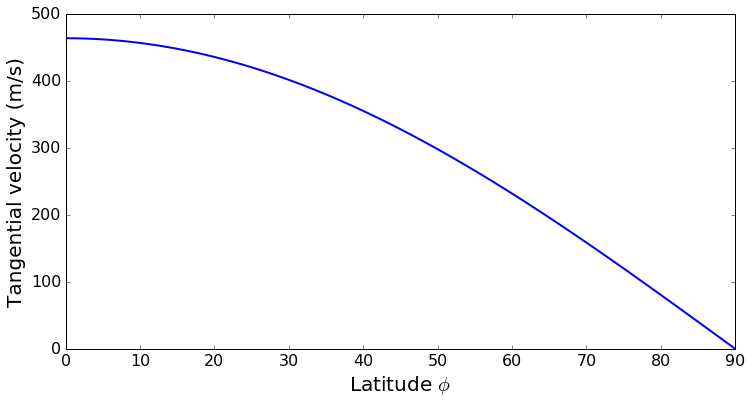

Velocity at equator: 463.831429805 m/s
Velocity at pole:    2.84014837927e-14 m/s


In [15]:
# goes to range 91 so we actually get 90 for the last element
tangential_velocity_at_latitude = lambda latitude: R_E*1000 * deg_to_rad(ROT_E) * np.cos(deg_to_rad(latitude))
velocity_by_latitude = [tangential_velocity_at_latitude(phi) for phi in range(0, 91)]
plot(r'Latitude $\phi$', r'Tangential velocity (m/s)', velocity_by_latitude, height=6)

print "Velocity at equator:", velocity_by_latitude[0], "m/s"
print "Velocity at pole:   ", velocity_by_latitude[-1], "m/s"

The floating point math gets a little fuzzy but the velocity at the pole is essentially zero.

#### b) *Explain the velocity at the pole..*
The velocity is zero at the pole because it is a single point rotating in space. There is no displacement so there can't be any velocity. We are measuring the angular velocity of a vector rotating around the pole, so if the vector *is* the pole, the velocity will be zero.

#### c) *For a geosynchronous orbit..*
At the moment when a spacecraft in a geosynchronous orbit inclined at 20 degrees is at 20 degrees in latitude it has zero velocity in the north/south direction. So its entire velocity is the eastward component. Since its orbit is circular, its speed is constant. This is great because we don't even need to bring any orbital equations into the mix. We can simply calculate the velocity necessary to trace out its circular orbit in 24 hours and we'll have the spacecraft's (constant) velocity.

In [16]:
#       orbit in meters       sec/day
print (GEO*1000 * 2*np.pi) / (24*3600), "m/s"

3066.25260755 m/s


Next calculate the velocity of a point at 20 degrees latitude as a vector. We already know that the only non-zero component of the vector is the tangential velocity so we can just calculate that part.

In [17]:
print "Tangential velocity at 20 degrees latitude:", tangential_velocity_at_latitude(20), "m/s"
print "As a vector: [0, {}, 0]".format(tangential_velocity_at_latitude(20))

Tangential velocity at 20 degrees latitude: 435.858971876 m/s
As a vector: [0, 435.858971876, 0]


Let's try coming at this from another angle. If we consider the given geosynchronous orbit in the $P$, $Q$, $W$ frame we can learn a few things. First, since it's circular the direction of $P$ (and thus of $Q$, and $W$) is arbitrary. More on that in a bit. Second, also since it's circular, the speed will be constant. Lastly, like all orbits its motion takes place in a plane. With these in mind we can determine that as the spacecraft is at $P$ its entire velocity is tangential to $P$ in the direction of $Q$. And we already know that its speed is $3066.25\ m/s$ So: $$v_P = \begin{bmatrix}0\\3066.25\\0\end{bmatrix}_{PQW}m/s$$

Now we need to put this into $GCI$ coordinates so we can compare it to our point on the ground. Since the direction of $P$ is arbitrary, let's choose it such that it lines up with the point on the ground at the moment the point lines up with $\hat{{x}}_{GCI}$. So the only transformation left is to rotate the orbit by $20^{\circ}$ about the $\hat{{y}}_{GCI}$ axis. $$\begin{bmatrix}0\\3066.25\\0\end{bmatrix}_{PQW}\begin{bmatrix}cos(20) & 0 & -sin(20) \\ 0 & 1 & 0 \\ sin(20) & 0 & cos(20)\end{bmatrix}_{rotate\ \hat{y}_{GCI}} = \begin{bmatrix}0\\3066.25\\0\end{bmatrix}_{GCI}$$

So to actually answer the question, the spacecraft is moving faster.

---

### Launch Window
* A sun-synchronous mission can tolerate deviation in RAAN of $\pm2^{\circ}$.*

- *a) Calculate the length of time that a rocket can launch each day, assuming that it has no dispersions in RAAN*
- *b) Assuming that the rocket has a Gaussian distributed error in its RAAN of $\sigma_\Omega = 0.1^{\circ}$ how much shorter is the launch window if you want the mission to meet its tolerance at a 1-sigma level?*
- *c) Same question with a 3-sigma level?*
---
#### *Calculate the length of time that a rocket can launch each day..*

In [18]:
raan_tolerance = 2.0
launch_window = 2*raan_tolerance/ROT_E
print launch_window / 60, "minutes"

16.0 minutes


#### *Assuming error in RAAN of $\sigma_\Omega = 0.1^{\circ}$..*

In [29]:
raan_error = 0.1
sigma = 1
launch_window = 2*(raan_tolerance - raan_error*sigma)/ROT_E
print np.floor(launch_window/60.0), "minutes,", launch_window % 60, "seconds"

15.0 minutes, 12.0 seconds


#### 3-sigma?

In [31]:
sigma = 3
launch_window = 2*(raan_tolerance - raan_error*sigma)/ROT_E
print np.floor(launch_window/60.0), "minutes,", launch_window % 60, "seconds"

13.0 minutes, 36.0 seconds


---
### Fuzzy Perimeter
*Apply the formulae on slide 37 to a rectangle with average values of $w = 1.5 cm$ and $h = 3.7 cm$ and with uncertainties of $\sigma_w = 0.2 cm$ and $\sigma_h = 0.25 cm$. Find the average value of the perimeter and the uncertainty of $\sigma_p$ in it. Express your answers in $cm$.*

The formulas on slide 37 are: $\bar{p} = 2(\bar{w} + \bar{h})$ and $\sigma_p^2 = 4(\sigma_w^2 + \sigma_h^2)$.

So the average value of the perimeter is $\bar{p} = 2(1.5 + 3.7) = 10.4$ and $\sigma_p = sqrt{4(0.2^2 + 0.25^2)} = 0.64$.

---
### Radius of Apogee and Perigee
- *a) Using the equations $r_p = a(1 - e)$ and $r_a = a(1 + e)$ derive the relations $a = \frac{r_a+r_p}{2}$ and $e = \frac{r_a - r_p}{2a} = \frac{r_a - r_p}{r_a + r_p}$*

$$r_p + r_a = a(1 - e) + a(1 + e)$$
$$r_p + r_a = a - ae + a + ae$$
$$r_p + r_a = 2a$$
$$\boxed{a = \frac{r_p + r_a}{2}}$$

$$r_a - r_p = a(1 + e) - a(1 - e)$$
$$r_a - r_p = a + ae - a + ae$$
$$r_a - r_p = 2ae$$
$$\boxed{e = \frac{r_a - r_p}{2a}}$$
$$2a = 2\left(\frac{r_a + r_p}{2}\right) = r_a + r_p$$
$$\boxed{e = \frac{r_a - r_p}{2a} = \frac{r_a - r_p}{r_a + r_p}}$$

- *b) Assume that the mean value of the $r_p = 7300 km$ and the mean value of $r_a = 12000 km$ find the mean value of $a$ and $e$.*
$$a = \frac{r_p + r_a}{2} = \frac{7300 + 12000}{2} \boxed{= 9650km}$$
$$e = \frac{r_a - r_p}{2a} = \frac{12000 - 7300}{19300} \boxed{= 0.24352}$$

- *c) Assume that the corresponding uncertainties are $\sigma_{r_p} = 20 km$ and $\sigma_{r_a} = 100 km$ (typically sized for a launch vehicle) find $\sigma_a$ and $\sigma_e$?*
$$\sigma_a^2 = \left(\frac{\partial a}{\partial r_p}\right)^2 \sigma_{r_p}^2 + \left(\frac{\partial a}{\partial r_a}\right)^2 \sigma_{r_a}^2$$
$$\sigma_a^2 = \frac{1}{2}^2 \sigma_{r_p}^2 + \frac{1}{2}^2 \sigma_{r_a}^2$$
$$\sigma_a^2 = \frac{1}{4} \sigma_{r_p}^2 + \frac{1}{4} \sigma_{r_a}^2$$
$$\sigma_a^2 = 2600$$
$$\boxed{\sigma_a = 50.99km}$$
---
$$\sigma_e^2 = \left(\frac{\partial e}{\partial r_a}\right)^2 \sigma_{r_a}^2 + \left(\frac{\partial e}{\partial r_p}\right)^2 \sigma_{r_p}^2$$
Let's find $\frac{\partial e}{\partial r_a}$ first. For some reason I find it helps to rewrite $e$ like this first..
$$e = (2a)^{-1}(r_a - r_p)$$
First we apply the product rule. Note that the second part of the product also uses the chain rule.
$$\frac{\partial e}{\partial r_a} = (2a)^{-1}(1 - 0) + (-2a)^{-2}(r_a-r_p)\frac{\partial a}{\partial r_a}$$
We already know that $\frac{\partial a}{\partial r_a}$ is $\frac{1}{2}$ from the first half of the problem so let's start simplyfing. Some of these steps maybe aren't worth saying explicitly but I tend to get lost in little details so I prefer to write out almost all the little steps.
$$\frac{\partial e}{\partial r_a} = \frac{1}{2a} - \frac{r_a-r_p}{2a^2}\frac{1}{2}$$
$$\frac{\partial e}{\partial r_a} = \frac{1}{2a} - \frac{r_a-r_p}{4a^2}$$
$$\frac{\partial e}{\partial r_a} = \frac{1}{2a}\frac{2a}{2a} - \frac{r_a-r_p}{4a^2}$$
$$\frac{\partial e}{\partial r_a} = \frac{2a - (r_a - r_p)}{4a^2}$$
$$\frac{\partial e}{\partial r_a} = \frac{(r_a + r_p) - (r_a - r_p)}{4a^2}$$
$$\frac{\partial e}{\partial r_a} = \frac{r_a + r_p - r_a + r_p}{4a^2}$$
$$\frac{\partial e}{\partial r_a} = \frac{2r_p}{4a^2}$$
$$\boxed{\frac{\partial e}{\partial r_a} = \frac{r_p}{2a^2}}$$

Now let's do it again for $\frac{\partial e}{\partial r_p}$.
$$\frac{\partial e}{\partial r_p} = (2a)^{-1}(0 - 1) + (-2a)^{-2}(r_a-r_p)\frac{\partial a}{\partial r_p}$$
$$\frac{\partial e}{\partial r_p} = -\frac{1}{2a} + \frac{r_a-r_p}{4a^2}$$
We can skip a few steps here since it's the same as above.
$$\boxed{\frac{\partial e}{\partial r_p} = -\frac{r_a}{2a^2}}$$

Now let's bring it back to our original question.
$$\sigma_e^2 = \left(\frac{\partial e}{\partial r_a}\right)^2 \sigma_{r_a}^2 + \left(\frac{\partial e}{\partial r_p}\right)^2 \sigma_{r_p}^2$$
$$\sigma_e^2 = \left(\frac{r_p}{2a^2}\right)^2 \sigma_{r_a}^2 + \left(-\frac{r_a}{2a^2}\right)^2 \sigma_{r_p}^2$$
$$\sigma_e^2 = \left(\frac{1}{2a^2}\right)^2 r_p^2 \sigma_{r_a}^2 + \left(\frac{1}{2a^2}\right)^2 r_a^2 \sigma_{r_p}^2$$
$$\sigma_e^2 = \left(\frac{1}{2a^2}\right)^2\left(r_p^2 \sigma_{r_a}^2 + r_a^2 \sigma_{r_p}^2\right)$$
$$\sigma_e = \left(\frac{1}{2a^2}\right)\sqrt{r_p^2 \sigma_{r_a}^2 + r_a^2 \sigma_{r_p}^2}$$
$$\sigma_e = \left(\frac{1}{2 \cdot 9650}\right)\sqrt{7300^2 \cdot 100^2 + 12000^2 \cdot 20^2}$$

In [7]:
a = 9650.0
r_p = 7300.0
r_a = 12000.0
sigma_r_a = 100.0
sigma_r_p = 20.0
sigma_e = (1.0/(2.0*a**2)) * (r_p**2 * sigma_r_a**2 + r_a**2 * sigma_r_p**2)**0.5
print sigma_e

0.00412596299572


$$\boxed{\sigma_e = 0.0041269}$$
And just since it's been a while since we've seen it, let's state this again.
$$\boxed{\sigma_a = 50.99km}$$

- *d) Assume that the launch vehicle has a 5-sigma error in the radius of apogee. What are the minimum and maximum values of $r_a$ consistent with this performance? Wh that correspond to a high is the largest value of $r_a$. (Assuming that means "What is the largest value of $r_a$)*

$$\boxed{r_a - 5\cdot\sigma_{r_a} = 11500km\ \ \ \ \ \ \ \ r_a + 5\cdot\sigma_{r_a} = 12500km}$$

$$a = \frac{r_p + r_a}{2} = \frac{7300 + 12500}{2} \boxed{= 9900km}$$
$$e = \frac{r_a - r_p}{2a} = \frac{12500 - 7300}{19800} \boxed{= 0.24352}$$